In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import normalize 
from sklearn.metrics import silhouette_samples, silhouette_score


In [2]:
employee_data = pd.read_csv('HR_comma_sep.csv', sep=',')
# employeeData=train_data.copy(deep=True)
# ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5year','departmennt','salary','left']

In [3]:
employee_data.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,departmennt,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
5,0.41,0.50,2,153,3,0,0,sales,low,1
6,0.10,0.77,6,247,4,0,0,sales,low,1
7,0.92,0.85,5,259,5,0,0,sales,low,1
8,0.89,1.00,5,224,5,0,0,sales,low,1
9,0.42,0.53,2,142,3,0,0,sales,low,1


In [17]:
left_employees= employee_data[employee_data["left"]==1]
left_employees= left_employees.drop(["Work_accident","departmennt","salary","left","promotion_last_5years"], axis=1)
# left_employees
X=left_employees.to_numpy()
X=normalize(X) #normalize the data.

#Now using the Elbow Method to pick the optimal K
diff_k= [i for i in range(1,11)]
diff_k_results=[]
silouhette_scores=[]
for k in diff_k:
    kmeans=KMeans(n_clusters=k, n_init=15).fit(X)
    diff_k_results.append(kmeans.inertia_)
    if k==1:
        continue
    silouhette_scores.append(silhouette_score(X,kmeans.labels_))




***The Silouhette Score is generally regarded as a good metric for finding out the optimal number of clusters. Here we use it and plot the silouhette score from k=2 to k=10. The general rule of thumb is to pick the value of k where the average silouehette score value is maximized as it shows that the values are in the correct clusters and are far away from their second closest clusters***


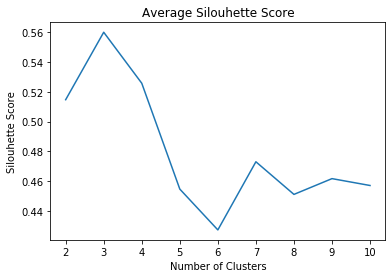

In [30]:
# plt.plot(diff_k,diff_k_results)
# plt.xticks(diff_k)
# plt.title("Elbow Curve for Different Values of K")
# plt.xlabel("Number of Clusters")
# plt.ylabel("SSE")

# plt.show()

# print(silouhette_scores)
plt.plot(diff_k[1:], silouhette_scores)
plt.xticks(diff_k[1:])
plt.title("Average Silouhette Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Silouhette Score")
plt.show()

# sns.scatterplot("time_spend_c", "satisfaction_level", data=left_employees)
# plt.show()

<h2>As we can see, k=3 is the optimal number of clusters so we will cluster accordingly.</h2>

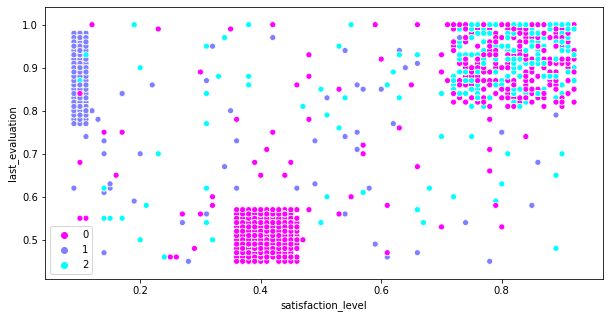

In [42]:
kmeans = KMeans(n_clusters = 3, n_init=15).fit(X)
labels=kmeans.labels_
left_employees['label']=kmeans.labels_
plt.figure(figsize=(10,5))
sns.scatterplot("satisfaction_level","last_evaluation",hue=labels,data=left_employees, palette="cool_r")
plt.show()



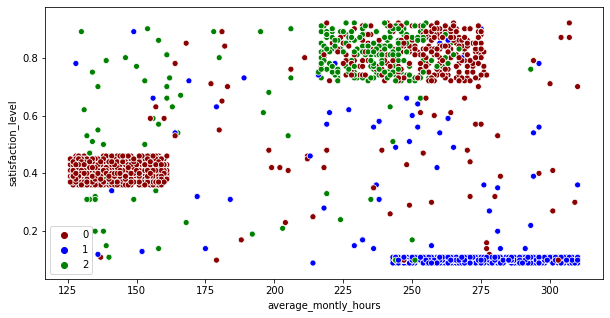

In [50]:
colors=["#8B0000", "#0000FF","#008000"]
# sns.set_palette(sns.color_palette(colors, n_colors=3))
palette=sns.color_palette(colors, n_colors=3)
plt.figure(figsize=(10,5))
sns.scatterplot("average_montly_hours","satisfaction_level",hue=labels,data=left_employees, palette=palette)
plt.show()



In [51]:
left_employees.groupby("label").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
label,,,,,
0,0.507305,0.616267,2.576687,174.016045,3.550260
1,0.138147,0.855246,6.091099,273.033508,3.941361
2,0.733763,0.888833,5.012072,223.756539,5.142857


From this we see that the employees that are left are clustered as follows:
<ol>
<li> Cluster 1: Moderate satisfaction level, moderate performance, and the least amount of workload. After spending an average of 3+ years in the company, it seems that lack of work led to them leaving seeking pastures anew. 
<li>Cluster 2: Highly rated by the company but having the least satisfaction level, these employees were overworked by the company which led to them leaving.
<li>Cluster 3: These employees are highly rated, and have a decent amount of workload and have spent over 5 years on average within the company. However, despite everything looking fine, they still left! We explore this with the help of other variables below
</ol>

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


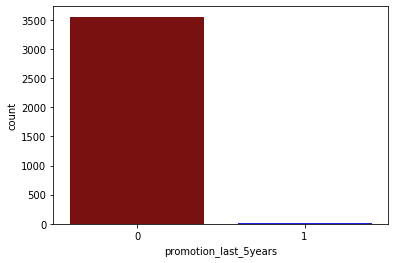

In [54]:
left_employees_original=employee_data[employee_data["left"]==1]
left_employees_original['label']=labels
cluster2_left=left_employees_original[left_employees_original['label']==2]
sns.countplot('promotion_last_5years',data=left_employees_original)
plt.show()


Hardly ANYONE got promoted, which explains why they left.